In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [10]:
gdp_df.shape

(6729, 3)

In [11]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [12]:
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [13]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

There is a very even number of observations per year, with it peaking in 2011.

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [15]:
gdp_df['Country'].value_counts(ascending=True)

Djibouti                           1
South Sudan                        8
Turks and Caicos Islands           8
Sint Maarten (Dutch part)          9
Nauru                             12
                                  ..
Vanuatu                           29
European Union                    29
Sierra Leone                      29
Central Europe and the Baltics    29
Kiribati                          29
Name: Country, Length: 243, dtype: int64

In [16]:
gdp_df['Country'].value_counts(ascending=True).head(20)

Djibouti                      1
South Sudan                   8
Turks and Caicos Islands      8
Sint Maarten (Dutch part)     9
Nauru                        12
Afghanistan                  17
SÃ£o TomÃ© and Principe      18
Qatar                        19
Other small states           19
Palau                        19
Small states                 19
Kosovo                       19
CuraÃ§ao                     19
Liberia                      19
Timor-Leste                  19
Cayman Islands               20
Libya                        20
Eritrea                      20
San Marino                   21
Montenegro                   22
Name: Country, dtype: int64

There are 243 countries represented in the data set. The max observations are 29, though a number have few - in particular, 4 of the countries have under 10. These countries are either likely very young (such as South Sudan), or did not collect measurements during some years.

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [17]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [18]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

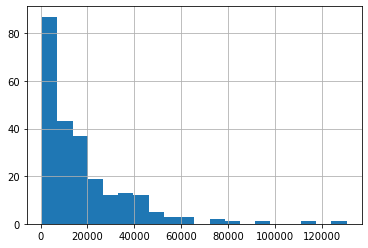

In [19]:
gdp_2014.GDP_Per_Capita.hist(bins=20);

The distribution is unimodal, right-skewed. There look to be only a few observations over $80,000.

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [20]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [21]:
gdp_years = gdp_df.loc[gdp_df['Year'].isin(['1990', '2017'])]
gdp_years.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2017,1758.465636
18,Albania,2017,11796.719185
45,Albania,1990,4458.247115
47,Algeria,2017,13822.389087
74,Algeria,1990,10300.015042


In [22]:
gdp_years = gdp_years.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
gdp_years

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [23]:
gdp_pivoted = gdp_years.dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [24]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

<ipython-input-24-bfc35d278deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [25]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape

(20, 3)

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
Bonus: Put both line charts on the same plot.

In [26]:
gdp_pivoted.sort_values('Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [27]:
gdp_lineplot = gdp_df.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
gdp_lineplot

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


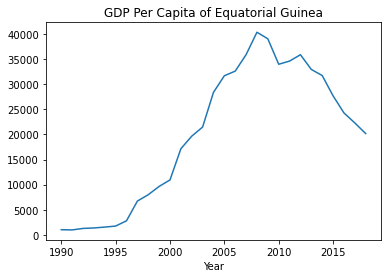

In [28]:
gdp_lineplot.loc['Equatorial Guinea'].plot(y='value', title='GDP Per Capita of Equatorial Guinea');

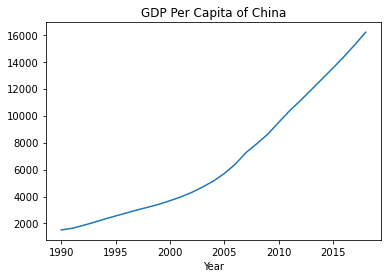

In [29]:
gdp_lineplot.loc['China'].plot(y='value', title='GDP Per Capita of China')

The GDP per capita of Equatorial Guinea rose quickly from 2000-2010, peaked, and then began to fall again. Meanwhile, China has risen at a more consistent pace, and is continuing to rise.

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [30]:
continents = pd.read_csv('../data/continents.csv')

19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [31]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [32]:
gdp_df = gdp_df.merge(continents, on='Country')

In [33]:
gdp_df.info

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2018     1734.723214      Asia
1     Afghanistan  2017     1758.465636      Asia
2     Afghanistan  2016     1757.023490      Asia
3     Afghanistan  2015     1766.593077      Asia
4     Afghanistan  2014     1795.735834      Asia
...           ...   ...             ...       ...
5329     Zimbabwe  1994     2768.309953    Africa
5330     Zimbabwe  1993     2572.870395    Africa
5331     Zimbabwe  1992     2591.007534    Africa
5332     Zimbabwe  1991     2906.272849    Africa
5333     Zimbabwe  1990     2819.549467    Africa

[5334 rows x 4 columns]>

20. Determine the number of countries per continent. Create a bar chart showing this.

In [34]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

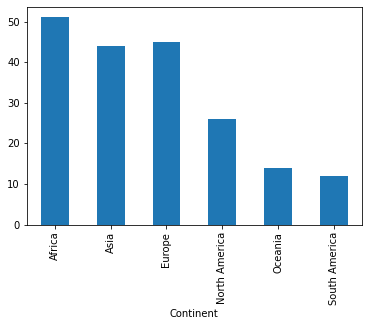

In [35]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind='bar');

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

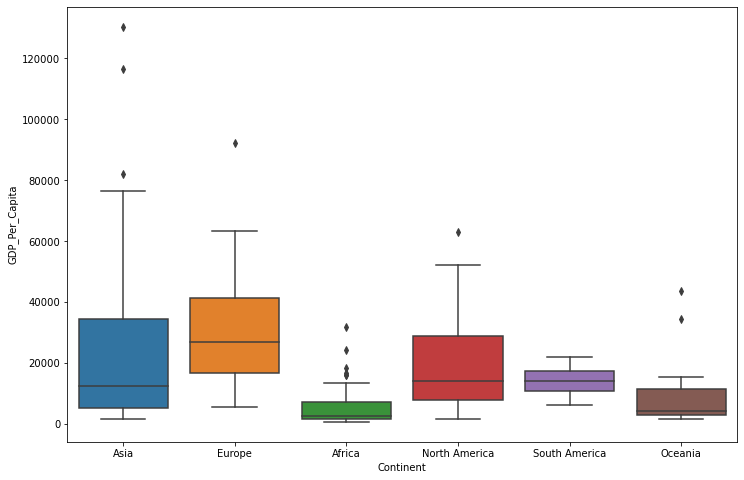

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=gdp_df[gdp_df['Year']==2014],
           x='Continent',
           y='GDP_Per_Capita');

Three of the continents - Asia, Europe, and North America - have a large range of values of GDP Per Capita. The other three have very narrow ranges. Europe has notably the highest levels of GDP Per Capita, though Asia does have the highest outliers. Africa is noticably lower than the other continents.

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [37]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [38]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [39]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [40]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)

In [41]:
internet_df.columns=['Country', 'Year', 'Internet_Users_Pct']

24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [42]:
internet_df.shape

(4495, 3)

In [43]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well. 

In [44]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(by=['Year'], ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


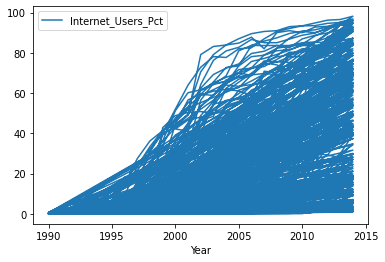

In [45]:
#I don't love how messy the line chart is.
internet_df[internet_df['Internet_Users_Pct']>0].plot(x='Year', y='Internet_Users_Pct');

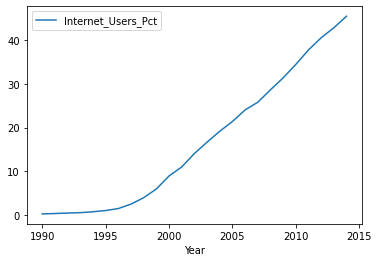

In [46]:
#However, if I combine all countries into one line, it would not be weighted by population, which I don't love.
internet_df[internet_df['Internet_Users_Pct']>0].groupby('Year').mean().plot();

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [47]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'])


27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [48]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [49]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [50]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [51]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [52]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].shape

(12, 5)

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [53]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [54]:
gdp_top_three = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False).head(3)['Country']
gdp_and_internet_use_top_three = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(gdp_top_three)]

In [55]:
gdp_and_internet_use_top_three

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1812,Luxembourg,2014,92349.186429,Europe,94.670000
1813,Luxembourg,2013,90656.380431,Europe,93.776500
1814,Luxembourg,2012,89505.159080,Europe,91.949924
1815,Luxembourg,2011,92005.016836,Europe,90.029859
1816,Luxembourg,2010,91743.293852,Europe,90.620000
...,...,...,...,...,...
2785,Singapore,1994,43835.783293,Asia,1.185204
2786,Singapore,1993,40714.217145,Asia,0.763278
2787,Singapore,1992,37463.009189,Asia,0.471368
2788,Singapore,1991,36201.887548,Asia,0.161504


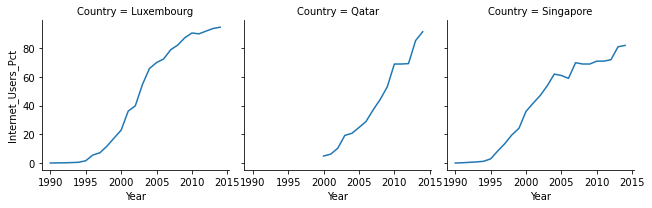

In [56]:
g = sns.FacetGrid(gdp_and_internet_use_top_three, col='Country')
g.map(sns.lineplot, 'Year', "Internet_Users_Pct")

Generally, the sharpest rise in internet use for all countries from around 2000 through 2008, give or take a few years.

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

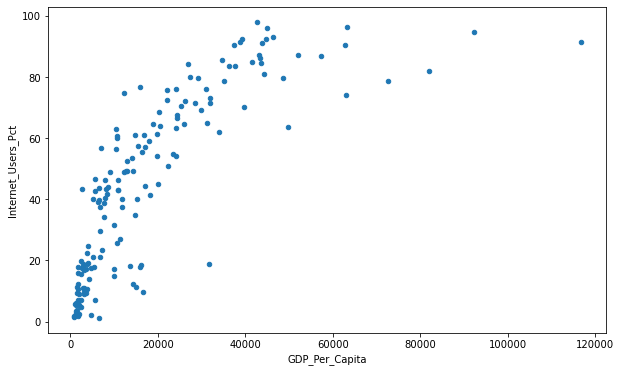

In [57]:
gdp_and_internet_use_2014.plot(kind='scatter', x='GDP_Per_Capita', y='Internet_Users_Pct', figsize=(10,6));

At low GDP per capita levels, any raise in GDP causes a large increase in internet users. Once GDP per capita hits about $20,000, most countries have at leat 50% internet users, and the slope begins to slow down.

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [58]:
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

The coefficient is .788, which means the two have a strong correlation.

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [59]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
gdp_and_internet_use_2014.head()

<ipython-input-59-7629864cb3cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_Per_Capita_Log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [60]:
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita_Log'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.       , 0.8844323],
       [0.8844323, 1.       ]])

This correlation is .884, which shows a stronger relationship between the two. This is likely more representative of the true relationship, because the original line was not linear.

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [61]:
gdp_and_internet_use_usa = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']
gdp_and_internet_use_usa.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000


In [62]:
gdp_and_internet_use_usa.describe()

,Year,GDP_Per_Capita,Internet_Users_Pct
count,25.000000,25.000000,25.000000
mean,2002.000000,45199.268242,46.024033
std,7.359801,5337.571477,30.507328
min,1990.000000,36284.582233,0.784729
25%,1996.000000,40178.202688,16.419353
50%,2002.000000,46029.198996,58.785404
75%,2008.000000,49883.113984,71.000000
max,2014.000000,52080.792568,87.360000


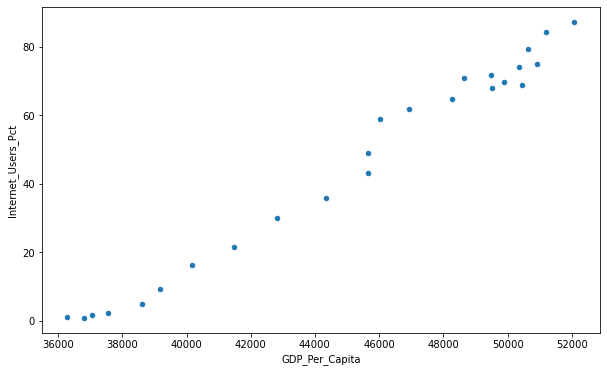

In [63]:
gdp_and_internet_use_usa.plot(kind='scatter', x='GDP_Per_Capita', y='Internet_Users_Pct', figsize=(10,6));

In [64]:
np.corrcoef(gdp_and_internet_use_usa['GDP_Per_Capita'], gdp_and_internet_use_usa['Internet_Users_Pct'])

array([[1.        , 0.99161802],
       [0.99161802, 1.        ]])

The coefficient could be used to interpret how steady the relationship of the two variables were as each grew - you can see that they didn't grow at an equally steady rate. But because it was just one country, the growth was similar enough that they ended up with a very close correlation.

ALTERNATIVELY

26BONUS: Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [65]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dem. Rep. Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
   

In [66]:
internet_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Rep.', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Dem. People's Rep. of Korea", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guia

In [67]:
#BEGIN WORKING ON EDUCATION BY GENDER

In [68]:
primary_education = pd.read_csv('../data/primary_education_by_gender.csv')
primary_education

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,All genders,Not applicable,Number,6217756.0
1,Afghanistan,2014,Female,Not applicable,Number,2484471.0
2,Afghanistan,2013,Female,Not applicable,Number,2401135.0
3,Afghanistan,2013,All genders,Not applicable,Number,5986268.0
4,Afghanistan,2012,All genders,Not applicable,Number,5767543.0
...,...,...,...,...,...,...
14138,Zimbabwe,1977,Female,Not applicable,Number,413963.0
14139,Zimbabwe,1976,Female,Not applicable,Number,406228.0
14140,Zimbabwe,1976,All genders,Not applicable,Number,882375.0
14141,Zimbabwe,1975,All genders,Not applicable,Number,862736.0


In [69]:
primary_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14143 entries, 0 to 14142
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reference Area        14143 non-null  object 
 1   Time Period           14143 non-null  int64  
 2   Sex                   14143 non-null  object 
 3   Age group             14143 non-null  object 
 4   Units of measurement  14143 non-null  object 
 5   Observation Value     14143 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 663.1+ KB


In [70]:
primary_education['Time Period'].value_counts().sort_index()

1975    333
1976    351
1977    345
1978    351
1979    338
1980    325
1981    360
1982    345
1983    346
1984    346
1985    339
1986    354
1987    323
1988    317
1989    316
1990    330
1991    363
1992    357
1993    349
1994    357
1995    347
1996    328
1997    301
1998    201
1999    392
2000    393
2001    390
2002    400
2003    377
2004    390
2005    398
2006    376
2007    399
2008    394
2009    398
2010    379
2011    384
2012    376
2013    347
2014    312
2015     16
Name: Time Period, dtype: int64

In [71]:
primary_education['Sex'].value_counts()

All genders    7340
Female         6803
Name: Sex, dtype: int64

In [72]:
primary_education = primary_education.drop(['Age group', 'Units of measurement'], 1)
primary_education

,Reference Area,Time Period,Sex,Observation Value
0,Afghanistan,2014,All genders,6217756.0
1,Afghanistan,2014,Female,2484471.0
2,Afghanistan,2013,Female,2401135.0
3,Afghanistan,2013,All genders,5986268.0
4,Afghanistan,2012,All genders,5767543.0
...,...,...,...,...
14138,Zimbabwe,1977,Female,413963.0
14139,Zimbabwe,1976,Female,406228.0
14140,Zimbabwe,1976,All genders,882375.0
14141,Zimbabwe,1975,All genders,862736.0


In [73]:
internet_df['Year'].value_counts().sort_index()

1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Year, dtype: int64

In [74]:
primary_education.columns = ['Country', 'Year', 'Gender', 'Number_Students']
primary_education.head()

,Country,Year,Gender,Number_Students
0,Afghanistan,2014,All genders,6217756.0
1,Afghanistan,2014,Female,2484471.0
2,Afghanistan,2013,Female,2401135.0
3,Afghanistan,2013,All genders,5986268.0
4,Afghanistan,2012,All genders,5767543.0


In [75]:
primary_education_female = primary_education[primary_education['Gender'] == 'Female']
primary_education_female

,Country,Year,Gender,Number_Students
1,Afghanistan,2014,Female,2484471.0
2,Afghanistan,2013,Female,2401135.0
5,Afghanistan,2012,Female,2348306.0
6,Afghanistan,2011,Female,2141833.0
9,Afghanistan,2010,Female,2076942.0
...,...,...,...,...
14134,Zimbabwe,1979,Female,386942.0
14135,Zimbabwe,1978,Female,385458.0
14138,Zimbabwe,1977,Female,413963.0
14139,Zimbabwe,1976,Female,406228.0


In [76]:
primary_education_all_genders = primary_education[primary_education['Gender'] == 'All genders']
primary_education_all_genders

,Country,Year,Gender,Number_Students
0,Afghanistan,2014,All genders,6217756.0
3,Afghanistan,2013,All genders,5986268.0
4,Afghanistan,2012,All genders,5767543.0
7,Afghanistan,2011,All genders,5291624.0
8,Afghanistan,2010,All genders,5279326.0
...,...,...,...,...
14133,Zimbabwe,1979,All genders,831879.0
14136,Zimbabwe,1978,All genders,826857.0
14137,Zimbabwe,1977,All genders,890460.0
14140,Zimbabwe,1976,All genders,882375.0


In [77]:
primary_education_proportion = primary_education_all_genders.merge(primary_education_female, on=['Country', 'Year'], suffixes=('_total', '_female'))
primary_education_proportion.head()

,Country,Year,Gender_total,Number_Students_total,Gender_female,Number_Students_female
0,Afghanistan,2014,All genders,6217756.0,Female,2484471.0
1,Afghanistan,2013,All genders,5986268.0,Female,2401135.0
2,Afghanistan,2012,All genders,5767543.0,Female,2348306.0
3,Afghanistan,2011,All genders,5291624.0,Female,2141833.0
4,Afghanistan,2010,All genders,5279326.0,Female,2076942.0


In [78]:
#Finding the Countries with NaN values. After looking at each country individually, most of the NaNs come from earlier years.
#Likely, they did have female students, they just didn't report each gender individually at the time.
#I will delete those rows, instead of replacing the NaN values with something else.
#Code will only show data if above merge uses left merge.
primary_education_proportion[primary_education_proportion['Gender_female'].isnull()]['Country'].value_counts().sort_values().tail(10)

Series([], Name: Country, dtype: int64)

In [79]:
primary_education_proportion['Percent_female'] = 100 * primary_education_proportion['Number_Students_female'] / primary_education_proportion['Number_Students_total']

In [80]:
primary_education_proportion = primary_education_proportion.drop(['Gender_total', 'Gender_female'], 1)
primary_education_proportion.head()

,Country,Year,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,5279326.0,2076942.0,39.341045


In [81]:
internet_education = gdp_and_internet_use.merge(primary_education_proportion, on=['Country', 'Year'])
internet_education

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,1795.735834,Asia,6.390000,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,1807.762344,Asia,5.900000,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,1772.764974,Asia,5.454545,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,1626.764793,Asia,5.000000,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,1671.581238,Asia,4.000000,5279326.0,2076942.0,39.341045
...,...,...,...,...,...,...,...,...
2710,Zimbabwe,2000,2945.993212,Africa,0.401434,2460669.0,1208748.0,49.122739
2711,Zimbabwe,1999,3054.064189,Africa,0.161676,2460323.0,1208790.0,49.131354
2712,Zimbabwe,1996,2985.856605,Africa,0.016790,2493791.0,1227900.0,49.238288
2713,Zimbabwe,1995,2736.486436,Africa,0.007684,2482508.0,1222686.0,49.252047


In [82]:
#There are about 800 fewer rows in the final merged DataFrame, compared to gdp_and_internet_use
#Much of this loss is in the late 1990's, also about 30 countries dropped each year in the 2000's.
#I'll come back to this if I have time.

In [83]:
internet_education

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,1795.735834,Asia,6.390000,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,1807.762344,Asia,5.900000,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,1772.764974,Asia,5.454545,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,1626.764793,Asia,5.000000,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,1671.581238,Asia,4.000000,5279326.0,2076942.0,39.341045
...,...,...,...,...,...,...,...,...
2710,Zimbabwe,2000,2945.993212,Africa,0.401434,2460669.0,1208748.0,49.122739
2711,Zimbabwe,1999,3054.064189,Africa,0.161676,2460323.0,1208790.0,49.131354
2712,Zimbabwe,1996,2985.856605,Africa,0.016790,2493791.0,1227900.0,49.238288
2713,Zimbabwe,1995,2736.486436,Africa,0.007684,2482508.0,1222686.0,49.252047


In [84]:
primary_education_proportion

,Country,Year,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,5279326.0,2076942.0,39.341045
...,...,...,...,...,...
6798,Zimbabwe,1979,831879.0,386942.0,46.514217
6799,Zimbabwe,1978,826857.0,385458.0,46.617251
6800,Zimbabwe,1977,890460.0,413963.0,46.488669
6801,Zimbabwe,1976,882375.0,406228.0,46.038022


In [85]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000
...,...,...,...,...,...
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739


In [86]:
primary_education_proportion['Country'].value_counts(sort=True)

MDG_Latin America and the Caribbean      40
Mauritius                                40
MDG_Least developed countries            40
MDG_South-eastern Asia                   40
MDG_Western Asia                         40
                                         ..
French Guiana                             3
United States Virgin Islands              2
Turkmenistan                              1
South Sudan                               1
Democratic People's Republic of Korea     1
Name: Country, Length: 238, dtype: int64

In [87]:
internet_education['Year'].value_counts().sort_index()

1990    100
1991     28
1992     33
1993     44
1994     59
1995     88
1996    102
1997     97
1998     65
1999    130
2000    133
2001    132
2002    136
2003    122
2004    129
2005    135
2006    128
2007    140
2008    142
2009    139
2010    136
2011    140
2012    132
2013    122
2014    103
Name: Year, dtype: int64

In [88]:
primary_education_proportion['Year'].value_counts().sort_index()

1975    153
1976    163
1977    160
1978    164
1979    157
1980    147
1981    164
1982    158
1983    159
1984    159
1985    160
1986    168
1987    151
1988    148
1989    150
1990    152
1991    171
1992    170
1993    167
1994    171
1995    167
1996    156
1997    143
1998     98
1999    195
2000    195
2001    194
2002    199
2003    187
2004    193
2005    198
2006    187
2007    198
2008    196
2009    199
2010    189
2011    192
2012    188
2013    173
2014    156
2015      8
Name: Year, dtype: int64

In [89]:
gdp_and_internet_use['Year'].value_counts().sort_index()

1990    146
1991     35
1992     45
1993     58
1994     78
1995    114
1996    141
1997    148
1998    151
1999    158
2000    159
2001    160
2002    162
2003    156
2004    159
2005    161
2006    160
2007    167
2008    166
2009    165
2010    167
2011    169
2012    164
2013    166
2014    164
Name: Year, dtype: int64

In [90]:
#Create pivot table to find countries with the largest change in gender proportion from 1990 to 2014

In [91]:
education_proportion_change = internet_education.pivot_table(values="Percent_female", index="Country", columns="Year")
education_proportion_change

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.686955,37.230350,36.894841,37.783095,38.571309,39.341045,40.475911,40.715882,40.110717,39.957679
Albania,48.076108,NaN,NaN,NaN,NaN,47.933671,48.001169,48.067727,NaN,48.142569,...,48.047484,48.112877,48.075193,47.857150,47.606119,47.564963,47.424650,47.228931,47.147016,47.317086
Algeria,44.661278,NaN,NaN,NaN,45.653021,45.868001,46.115622,46.295776,NaN,46.646006,...,46.997875,47.035944,47.236419,47.308740,47.287024,47.335137,47.365335,47.544985,47.661308,47.727582
Angola,48.024351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.214664,NaN,...,NaN,NaN,NaN,46.123956,45.842513,44.738411,38.912048,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48.906561,48.287494,48.332742,47.334281,47.673883,48.215823,NaN,48.122297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,49.202361,NaN,NaN,NaN,NaN,48.407028,48.446390,49.133932,NaN,49.134191,...,48.646891,48.634875,48.519260,48.600818,48.571638,48.453008,48.345643,NaN,NaN,NaN
Vanuatu,47.067958,NaN,NaN,NaN,NaN,NaN,NaN,47.503701,NaN,47.627647,...,47.692707,47.790070,47.362297,47.684826,47.236985,47.344265,NaN,NaN,47.269188,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.947653,...,41.599049,NaN,NaN,43.638256,NaN,43.975312,43.939828,44.283637,44.656507,NaN


In [92]:
education_proportion_change_ends = internet_education.loc[internet_education['Year'].isin(['1990', '2014'])]
education_proportion_change_ends

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,1795.735834,Asia,6.39,6217756.0,2484471.0,39.957679
13,Albania,2014,10700.993216,Europe,60.10,195720.0,92609.0,47.317086
32,Albania,1990,4458.247115,Europe,0.00,278446.0,133866.0,48.076108
33,Algeria,2014,13557.769757,Africa,18.09,3765307.0,1797090.0,47.727582
53,Algeria,1990,10300.015042,Africa,0.00,4027612.0,1798783.0,44.661278
...,...,...,...,...,...,...,...,...
2626,United Arab Emirates,1990,112349.597967,Asia,0.00,215532.0,103968.0,48.237849
2644,Uruguay,1990,9841.947945,South America,0.00,346416.0,168783.0,48.722634
2661,Uzbekistan,1990,3851.572604,Asia,0.00,1711300.0,842000.0,49.202361
2676,Vanuatu,1990,2550.348904,Oceania,0.00,24471.0,11518.0,47.067958


In [93]:
education_proportion_change_range = education_proportion_change_ends.pivot_table(values='Percent_female', index='Country', columns='Year')
education_proportion_change_range

Year,1990,2014
Country,,
Afghanistan,NaN,39.957679
Albania,48.076108,47.317086
Algeria,44.661278,47.727582
Angola,48.024351,NaN
Antigua and Barbuda,NaN,48.122297
...,...,...
United Arab Emirates,48.237849,48.888173
Uruguay,48.722634,NaN
Uzbekistan,49.202361,NaN


In [94]:
education_proportion_change_range['Change'] = education_proportion_change_range[2014] - education_proportion_change_range[1990]
education_proportion_change_range

Year,1990,2014,Change
Country,,,
Afghanistan,NaN,39.957679,NaN
Albania,48.076108,47.317086,-0.759022
Algeria,44.661278,47.727582,3.066304
Angola,48.024351,NaN,NaN
Antigua and Barbuda,NaN,48.122297,NaN
...,...,...,...
United Arab Emirates,48.237849,48.888173,0.650324
Uruguay,48.722634,NaN,NaN
Uzbekistan,49.202361,NaN,NaN


In [95]:
education_proportion_change_range['Change'].sort_values(ascending=True).head(20)

Country
Lesotho          -5.704239
Colombia         -4.493981
Suriname         -2.444057
Kazakhstan       -1.821800
South Africa     -1.050493
Jamaica          -1.036808
Honduras         -1.032120
Netherlands      -0.997168
Albania          -0.759022
Israel           -0.660571
Switzerland      -0.469626
Indonesia        -0.392253
Denmark          -0.355835
Chile            -0.338968
Tonga            -0.237186
Kiribati         -0.184063
Barbados         -0.160954
Czech Republic   -0.157003
Belgium          -0.149685
Austria          -0.075734
Name: Change, dtype: float64

In [96]:
education_proportion_change_range_to_use = education_proportion_change_range.drop(columns=[1990, 2014], axis=1)
education_proportion_change_range_to_use

Year,Change
Country,
Afghanistan,NaN
Albania,-0.759022
Algeria,3.066304
Angola,NaN
Antigua and Barbuda,NaN
...,...
United Arab Emirates,0.650324
Uruguay,NaN
Uzbekistan,NaN


In [97]:
education_proportion_change_final = education_proportion_change.merge(education_proportion_change_range_to_use, on='Country')
education_proportion_change_final

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Change
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.230350,36.894841,37.783095,38.571309,39.341045,40.475911,40.715882,40.110717,39.957679,NaN
Albania,48.076108,NaN,NaN,NaN,NaN,47.933671,48.001169,48.067727,NaN,48.142569,...,48.112877,48.075193,47.857150,47.606119,47.564963,47.424650,47.228931,47.147016,47.317086,-0.759022
Algeria,44.661278,NaN,NaN,NaN,45.653021,45.868001,46.115622,46.295776,NaN,46.646006,...,47.035944,47.236419,47.308740,47.287024,47.335137,47.365335,47.544985,47.661308,47.727582,3.066304
Angola,48.024351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.214664,NaN,...,NaN,NaN,46.123956,45.842513,44.738411,38.912048,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48.906561,48.287494,48.332742,47.334281,47.673883,48.215823,NaN,48.122297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,48.237849,NaN,NaN,NaN,NaN,47.860472,48.114549,48.049201,48.149079,48.029103,...,48.547540,48.513910,NaN,48.156779,48.589660,48.636836,48.607345,48.736091,48.888173,0.650324
Uruguay,48.722634,NaN,NaN,NaN,48.586074,48.573405,48.634008,48.621295,NaN,48.587435,...,48.305089,48.292200,48.221235,48.139183,48.159469,NaN,NaN,48.265711,NaN,NaN
Uzbekistan,49.202361,NaN,NaN,NaN,NaN,48.407028,48.446390,49.133932,NaN,49.134191,...,48.634875,48.519260,48.600818,48.571638,48.453008,48.345643,NaN,NaN,NaN,NaN


In [98]:
education_proportion_change_final.isna().sum()

Year
1990       37
1991      109
1992      104
1993       96
1994       83
1995       56
1996       44
1997       50
1998       75
1999       19
2000       16
2001       19
2002       15
2003       28
2004       22
2005       15
2006       19
2007       11
2008       10
2009       11
2010       15
2011       17
2012       20
2013       26
2014       34
Change     71
dtype: int64

In [99]:
education_proportion_change_final['Change'].sort_values(ascending=False).head(30)

Country
Nepal                   14.663067
Guinea                  14.559886
Benin                   13.436387
Pakistan                10.563485
Burkina Faso            10.451432
Senegal                  9.797543
Mali                     9.296375
Togo                     9.116679
Mauritania               9.093369
Niger                    8.878919
Morocco                  8.172161
Ethiopia                 7.893929
Burundi                  6.085652
Mozambique               4.641266
Oman                     4.494783
Malawi                   4.301537
Ghana                    4.088007
Egypt                    3.809601
Solomon Islands          3.384198
Algeria                  3.066304
Tunisia                  2.669228
Sweden                   1.274671
Sri Lanka                0.967951
Malta                    0.935889
Kenya                    0.878638
Madagascar               0.857231
Myanmar                  0.849525
Cameroon                 0.804032
Rwanda                   0.687603
United

In [100]:
#Create pivot table to find countries with the largest change in internet use from 1990 to 2014

In [101]:
internet_proportion_change = internet_education.pivot_table(values="Internet_Users_Pct", index="Country", columns="Year")
internet_proportion_change

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224148,2.107124,1.900000,1.840000,3.550000,4.00,5.000,5.454545,5.9,6.39
Albania,0.0,NaN,NaN,NaN,NaN,0.011169,0.032197,0.048594,NaN,0.081437,...,6.043891,9.609991,15.036115,23.860000,41.200000,45.00,49.000,54.655959,57.2,60.10
Algeria,0.0,NaN,NaN,NaN,0.000361,0.001769,0.001739,0.010268,NaN,0.199524,...,5.843942,7.375985,9.451191,10.180000,11.230000,12.50,14.000,15.228027,16.5,18.09
Angola,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018454,NaN,...,NaN,NaN,NaN,4.600000,6.000000,10.00,14.776,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.000000,38.000000,42.000000,47.00,52.000,58.000000,NaN,64.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0.0,NaN,NaN,NaN,NaN,0.001527,0.004285,0.010537,NaN,0.030688,...,3.343510,6.388322,7.490605,9.080115,17.058216,20.00,30.200,NaN,NaN,NaN
Vanuatu,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.139506,NaN,0.538300,...,5.082334,5.850585,6.800000,7.269120,7.500000,8.00,NaN,NaN,11.3,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056629,...,1.048598,NaN,NaN,6.890000,NaN,12.35,14.905,17.446500,20.0,NaN


In [102]:
internet_proportion_change_range = education_proportion_change_ends.pivot_table(values='Internet_Users_Pct', index='Country', columns='Year')
internet_proportion_change_range

Year,1990,2014
Country,,
Afghanistan,NaN,6.39
Albania,0.0,60.10
Algeria,0.0,18.09
Angola,0.0,NaN
Antigua and Barbuda,NaN,64.00
...,...,...
United Arab Emirates,0.0,90.40
Uruguay,0.0,NaN
Uzbekistan,0.0,NaN


In [103]:
internet_proportion_change_range['Change'] = internet_proportion_change_range[2014] - internet_proportion_change_range[1990]
education_proportion_change_range

Year,1990,2014,Change
Country,,,
Afghanistan,NaN,39.957679,NaN
Albania,48.076108,47.317086,-0.759022
Algeria,44.661278,47.727582,3.066304
Angola,48.024351,NaN,NaN
Antigua and Barbuda,NaN,48.122297,NaN
...,...,...,...
United Arab Emirates,48.237849,48.888173,0.650324
Uruguay,48.722634,NaN,NaN
Uzbekistan,49.202361,NaN,NaN


In [104]:
internet_proportion_change_range_to_use = internet_proportion_change_range.drop(columns=[1990, 2014], axis=1)

In [105]:
education_proportion_change_final = education_proportion_change_final.merge(internet_proportion_change_range_to_use, on='Country', suffixes=['_gender', '_internet'])
education_proportion_change_final

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,Change_gender,Change_internet
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.894841,37.783095,38.571309,39.341045,40.475911,40.715882,40.110717,39.957679,NaN,NaN
Albania,48.076108,NaN,NaN,NaN,NaN,47.933671,48.001169,48.067727,NaN,48.142569,...,48.075193,47.857150,47.606119,47.564963,47.424650,47.228931,47.147016,47.317086,-0.759022,60.10
Algeria,44.661278,NaN,NaN,NaN,45.653021,45.868001,46.115622,46.295776,NaN,46.646006,...,47.236419,47.308740,47.287024,47.335137,47.365335,47.544985,47.661308,47.727582,3.066304,18.09
Angola,48.024351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.214664,NaN,...,NaN,46.123956,45.842513,44.738411,38.912048,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.906561,48.287494,48.332742,47.334281,47.673883,48.215823,NaN,48.122297,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,48.237849,NaN,NaN,NaN,NaN,47.860472,48.114549,48.049201,48.149079,48.029103,...,48.513910,NaN,48.156779,48.589660,48.636836,48.607345,48.736091,48.888173,0.650324,90.40
Uruguay,48.722634,NaN,NaN,NaN,48.586074,48.573405,48.634008,48.621295,NaN,48.587435,...,48.292200,48.221235,48.139183,48.159469,NaN,NaN,48.265711,NaN,NaN,NaN
Uzbekistan,49.202361,NaN,NaN,NaN,NaN,48.407028,48.446390,49.133932,NaN,49.134191,...,48.519260,48.600818,48.571638,48.453008,48.345643,NaN,NaN,NaN,NaN,NaN


In [106]:
#DATAFRAMES THAT I NEED:
#internet_education - COMPLETE - Use this to make line charts/FaceGrid
#education_proportion_change_final - COMPLETE - Use this to grab the best and worst performing countries by gender.

In [107]:
internet_education

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,1795.735834,Asia,6.390000,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,1807.762344,Asia,5.900000,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,1772.764974,Asia,5.454545,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,1626.764793,Asia,5.000000,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,1671.581238,Asia,4.000000,5279326.0,2076942.0,39.341045
...,...,...,...,...,...,...,...,...
2710,Zimbabwe,2000,2945.993212,Africa,0.401434,2460669.0,1208748.0,49.122739
2711,Zimbabwe,1999,3054.064189,Africa,0.161676,2460323.0,1208790.0,49.131354
2712,Zimbabwe,1996,2985.856605,Africa,0.016790,2493791.0,1227900.0,49.238288
2713,Zimbabwe,1995,2736.486436,Africa,0.007684,2482508.0,1222686.0,49.252047


In [108]:
education_proportion_change_final

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,Change_gender,Change_internet
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.894841,37.783095,38.571309,39.341045,40.475911,40.715882,40.110717,39.957679,NaN,NaN
Albania,48.076108,NaN,NaN,NaN,NaN,47.933671,48.001169,48.067727,NaN,48.142569,...,48.075193,47.857150,47.606119,47.564963,47.424650,47.228931,47.147016,47.317086,-0.759022,60.10
Algeria,44.661278,NaN,NaN,NaN,45.653021,45.868001,46.115622,46.295776,NaN,46.646006,...,47.236419,47.308740,47.287024,47.335137,47.365335,47.544985,47.661308,47.727582,3.066304,18.09
Angola,48.024351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.214664,NaN,...,NaN,46.123956,45.842513,44.738411,38.912048,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.906561,48.287494,48.332742,47.334281,47.673883,48.215823,NaN,48.122297,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,48.237849,NaN,NaN,NaN,NaN,47.860472,48.114549,48.049201,48.149079,48.029103,...,48.513910,NaN,48.156779,48.589660,48.636836,48.607345,48.736091,48.888173,0.650324,90.40
Uruguay,48.722634,NaN,NaN,NaN,48.586074,48.573405,48.634008,48.621295,NaN,48.587435,...,48.292200,48.221235,48.139183,48.159469,NaN,NaN,48.265711,NaN,NaN,NaN
Uzbekistan,49.202361,NaN,NaN,NaN,NaN,48.407028,48.446390,49.133932,NaN,49.134191,...,48.519260,48.600818,48.571638,48.453008,48.345643,NaN,NaN,NaN,NaN,NaN


In [109]:
internet_education.to_csv('internet_education.csv')

In [110]:
education_proportion_change_final.to_csv('education_proportion_change_final.csv')